<a href="https://colab.research.google.com/github/olgasherbiena/KPI/blob/MMSP/lisagu_figurs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Intro to NumPy
NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays (https://en.wikipedia.org/wiki/NumPy).

Numpy is incredibly fast, as it has bindings to C libraries.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Фігура Лісажу першого рангу
#### w1/w2=1

### Using built-in methods

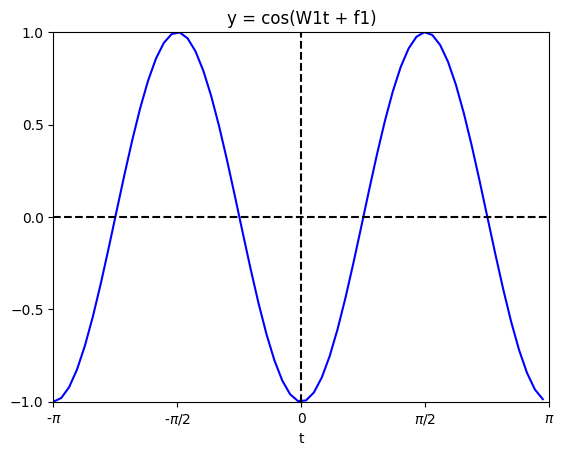

In [181]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(-np.pi, np.pi, 0.1)
wx = 2
wy = 1
fx = -np.pi
fy = 0
x = np.cos(wx*t + fx)
y = np.cos(wy*t + fy)

# перший графік у лівому subplot
plt.plot(t, x, 'b-')
plt.axis([-np.pi, np.pi, -1, 1])
plt.yticks(np.arange(-1, 1.1, 0.5))
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], [r'-$\pi$', r'-$\pi/2$', '0', r'$\pi/2$', r'$\pi$'])
plt.title('y = cos(W1t + f1)')
plt.xlabel('t')
plt.plot([-np.pi, np.pi], [0, 0], 'k--')
plt.plot([0,0], [-1,1], 'k--')
plt.show()



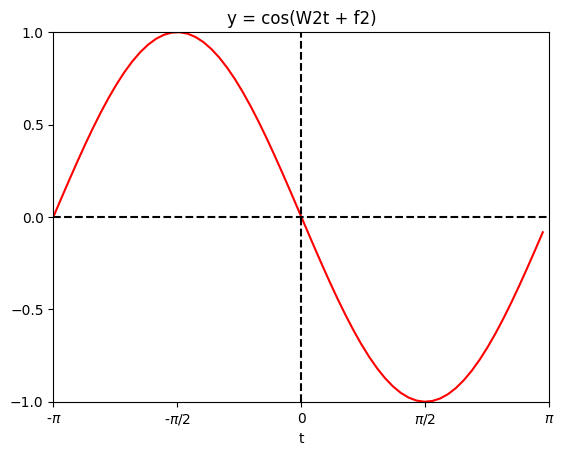

In [137]:
# другий графік у правому subplot
plt.plot(t, y, 'r-')
plt.axis([-np.pi, np.pi, -1, 1])
plt.yticks(np.arange(-1, 1.1, 0.5))
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], [r'-$\pi$', r'-$\pi/2$', '0', r'$\pi/2$', r'$\pi$'])
plt.title('y = cos(W2t + f2)')
plt.xlabel('t')

plt.plot([-np.pi, np.pi], [0, 0], 'k--')
plt.plot([0,0], [-1,1], 'k--')
plt.show()


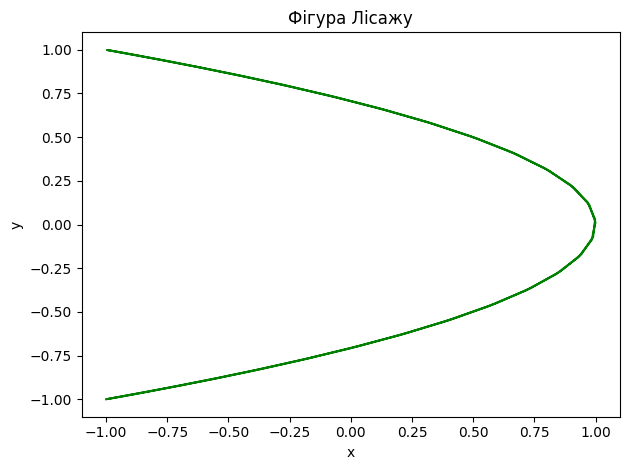

In [182]:

plt.plot(x, y, 'g-')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Фігура Лісажу')

plt.tight_layout()
plt.show()

# Поліном Чебишева

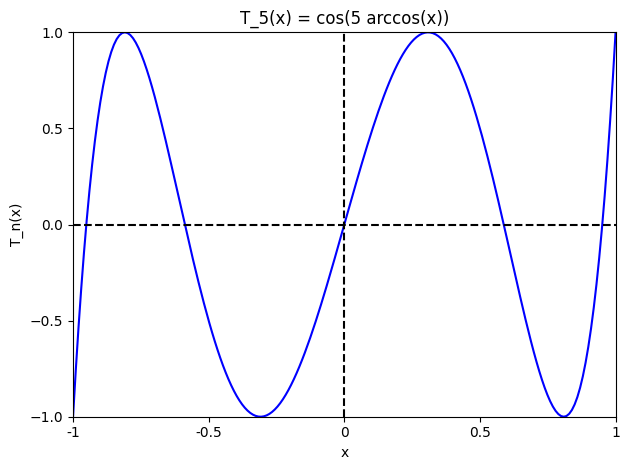

In [186]:
import numpy as np
import matplotlib.pyplot as plt

# Параметри
n = 5  # порядок
x = np.linspace(-1, 1, 200)
T = np.cos(n * np.arccos(x))

plt.plot(x, T, 'b-')
plt.axis([-1, 1, -1, 1])
plt.xticks([-1, -0.5, 0, 0.5, 1], ['-1', '-0.5', '0', '0.5', '1'])
plt.yticks(np.arange(-1, 1.1, 0.5))
plt.title(f'T_{n}(x) = cos({n} arccos(x))')
plt.xlabel('x')
plt.ylabel('T_n(x)')

# Горизонтальна та вертикальна лінії
plt.axhline(0, color='k', linestyle='--')
plt.axvline(0, color='k', linestyle='--')

plt.tight_layout()
plt.show()
